## Project 1: Centrality Analysis
### Project Description 
Project Description
The objective of this project to check does Gender or Education influence how central the person is in
her or his Facebook network. For this analysis a real sample data from Facebook will be used. Degree
centrality and eigenvector centrality will be used as measure of centrality for this project.
 
 
### Data
The sample data for this project is obtained from Stanford university’s snap (Stanford Network Analysis
Project) website. The dataset contains 10 networks and for this project one of the networks (network
3980).

In [1]:
#Load all Required Pacakges
import networkx as nx
import matplotlib
import urllib
import numpy as np
import pandas as pd
from itertools import *
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (14,10)

#### Load Data
Load data from github where the network file is stored

In [2]:
n3980_edges = urllib.urlopen("https://raw.githubusercontent.com/mkds/MSDA/master/DATA620/DATA/3980.edges")
social_n3980=nx.read_edgelist(n3980_edges,nodetype=int)
print "Number of nodes in network",social_n3980.number_of_nodes()
print "Number of Edges in network",social_n3980.number_of_edges()

Number of nodes in network 52
Number of Edges in network 146


### Network Analysis
#### Graph Diagram
Let's draw the graph. As the data is anonymized, the nodes does not represent the user name. As the labels are just ids, they are not useful and so not printed in the graph.

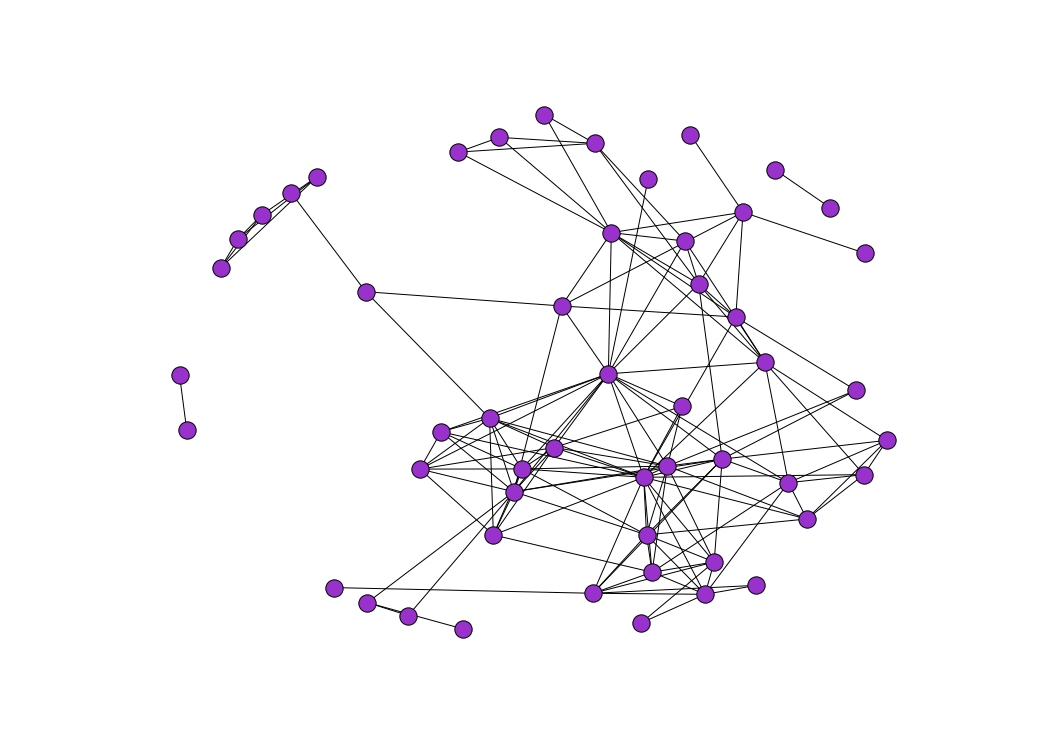

In [3]:
nx.draw(social_n3980,node_color="darkorchid")           

#### Read Network Properties
The network properties are given in a separate file. We are interested in Gender and hence only the node id and gender property are read. 

In [4]:
n3980_properties = urllib.urlopen("https://raw.githubusercontent.com/mkds/MSDA/master/DATA620/DATA/3980.feat")

n3980_prop=pd.read_csv(n3980_properties,delim_whitespace=True,names=('node','Gender_1'),
                                   usecols=(0,20))
#Drop the nodes which does not have any edges
n3980_prop=n3980_prop[n3980_prop['node'].isin(social_n3980.node.keys())]
#First five rows of property
n3980_prop[0:5]

,node,Gender_1
0,3981,1
1,3982,0
2,3983,0
4,3985,0
5,3986,0


#### Degree Centrality
Let's compute degree centrality and check the maximum and minimum degrees

In [5]:
degrees = nx.degree(social_n3980)
max_degree=max(degrees,key=degrees.get)
print "Max degree (interaction) of the graph is ",degrees[max_degree]
print "Node with max degree ",max_degree
min_degree=min(degrees,key=degrees.get)
print "Min degree  of the graph is ",degrees[min_degree]
print "Node with max degree ",min_degree

Max degree (interaction) of the graph is  18
Node with max degree  4030
Min degree  of the graph is  1
Node with max degree  3983


#### Visualize Graph by Centrality
In order to visualize the centrality scores of the node, let's make the node size correspond to degree centrality

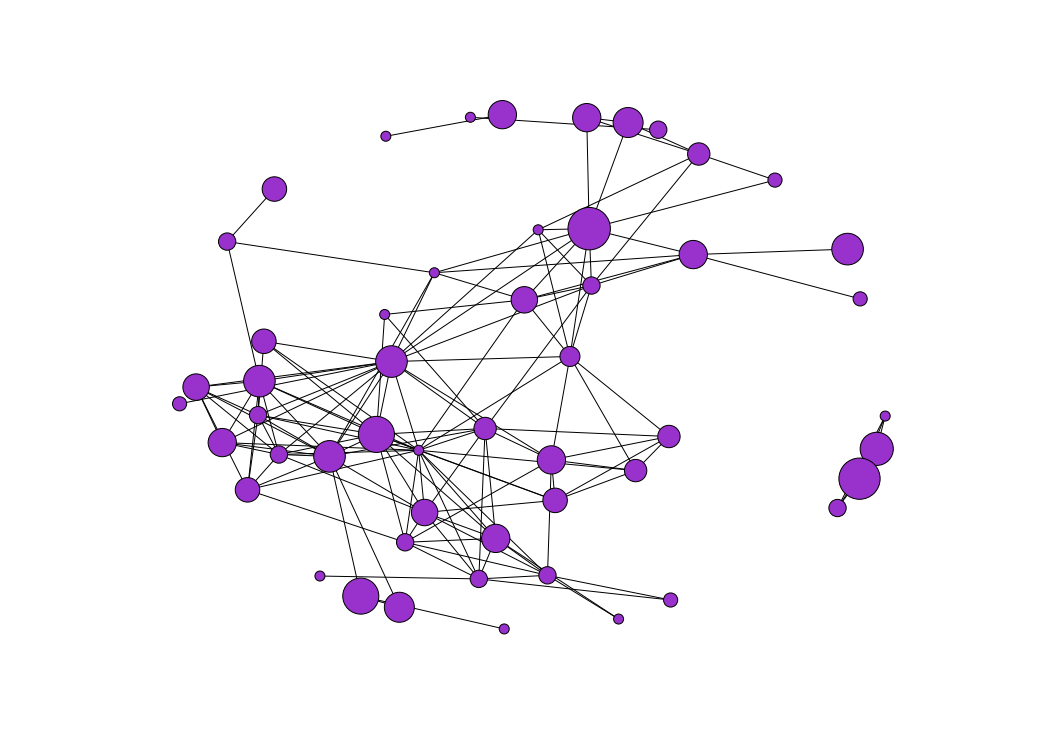

In [6]:
degree_centrality=[degrees[n] * 100 for n in n3980_prop['node']]
node_size = [degrees[n] * 100 for n in n3980_prop['node']]

nx.draw(social_n3980,nodelist=degrees.keys(),
        node_size=node_size,node_color="darkorchid")

#### Visualize degree Centrality by Gender
In order to visually inspect if the degree centrality differs by gender, let's color code the node by gender

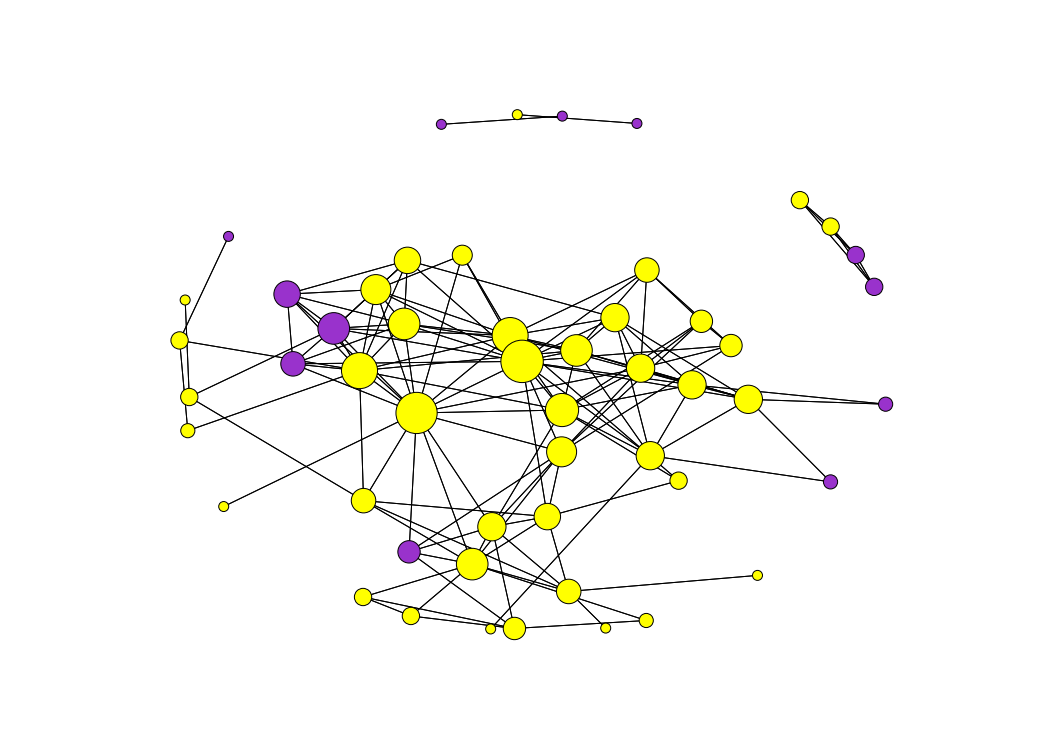

In [7]:
spring_pos=nx.spring_layout(social_n3980)
nx.draw(social_n3980,nodelist=n3980_prop[n3980_prop['Gender_1']==1]['node'].tolist(),
        node_size=list(compress(node_size,n3980_prop['Gender_1']==1)),
       node_color="darkorchid",pos=spring_pos)
nx.draw(social_n3980,nodelist=n3980_prop[n3980_prop['Gender_1']!=1]['node'].tolist(),
        node_size=list(compress(node_size,n3980_prop['Gender_1']!=1)),
        node_color="yellow",pos=spring_pos)


#### Eigenvector Centrality
Let's compute eigenvector centrality and check the minimum and maximum values.


In [8]:
eigen_degrees = nx.eigenvector_centrality(social_n3980)
max_eigen_degree=max(eigen_degrees,key=eigen_degrees.get)
print "Max Eigen degree of the graph is ",eigen_degrees[max_eigen_degree]
print "Node with max eigen degree ",max_eigen_degree
min_eigen_degree=min(degrees,key=degrees.get)
print "Min degree  of the graph is ",eigen_degrees[min_eigen_degree]
print "Node with max degree ",min_eigen_degree

Max Eigen degree of the graph is  0.354412711628
Node with max eigen degree  4030
Min degree  of the graph is  0.0148192063185
Node with max degree  3983


#### Visualize Eigenvector centrality
In order to visualize the eigenvector centrality scores of the node, let's make the node size correspond to eigen vector centrality. We could see that the size of nodes which are connected to other nodes which have many connection has increased compared to degree centrality. The nodes which are not part of the core network has very less eigenvector centrality indicating they are not well connected.

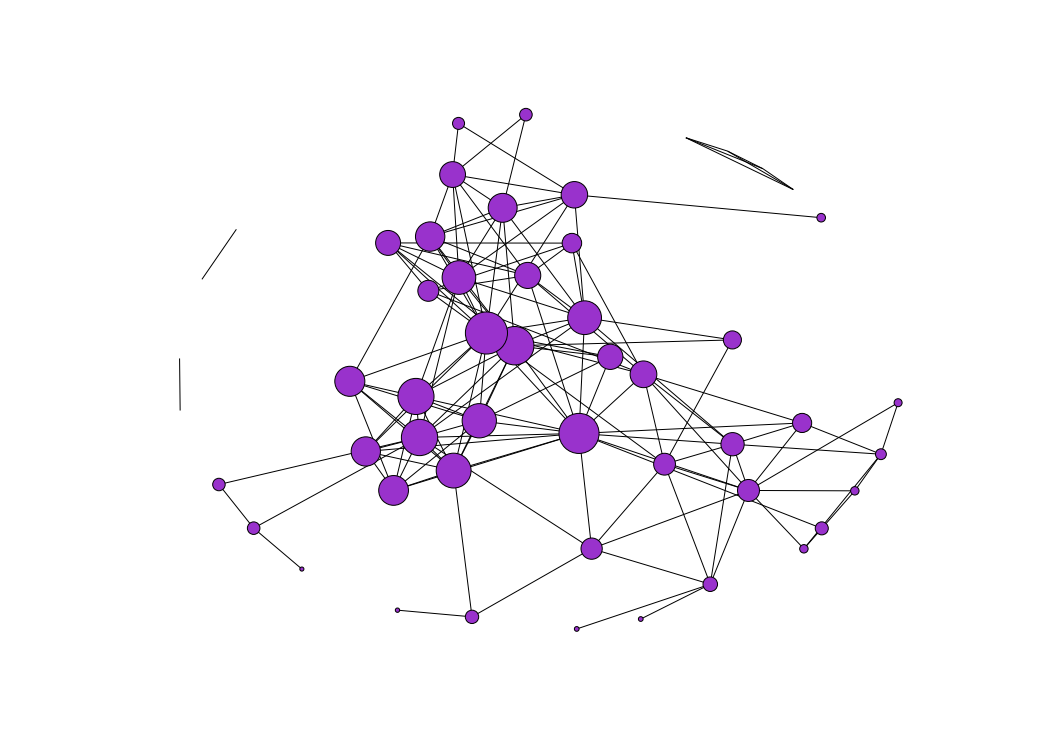

In [9]:
spring_pos=nx.spring_layout(social_n3980)

eigen_node_size = [eigen_degrees[n] * 5000 for n in n3980_prop['node']]
nx.draw(social_n3980,nodelist=n3980_prop['node'].tolist(),
        node_size=eigen_node_size,node_color="darkorchid",pos=spring_pos)

#### Visualize Eigenvector centrality by gender
In order to visually inspect if the eigenvector centrality differs by gender, let's color code the node by gender

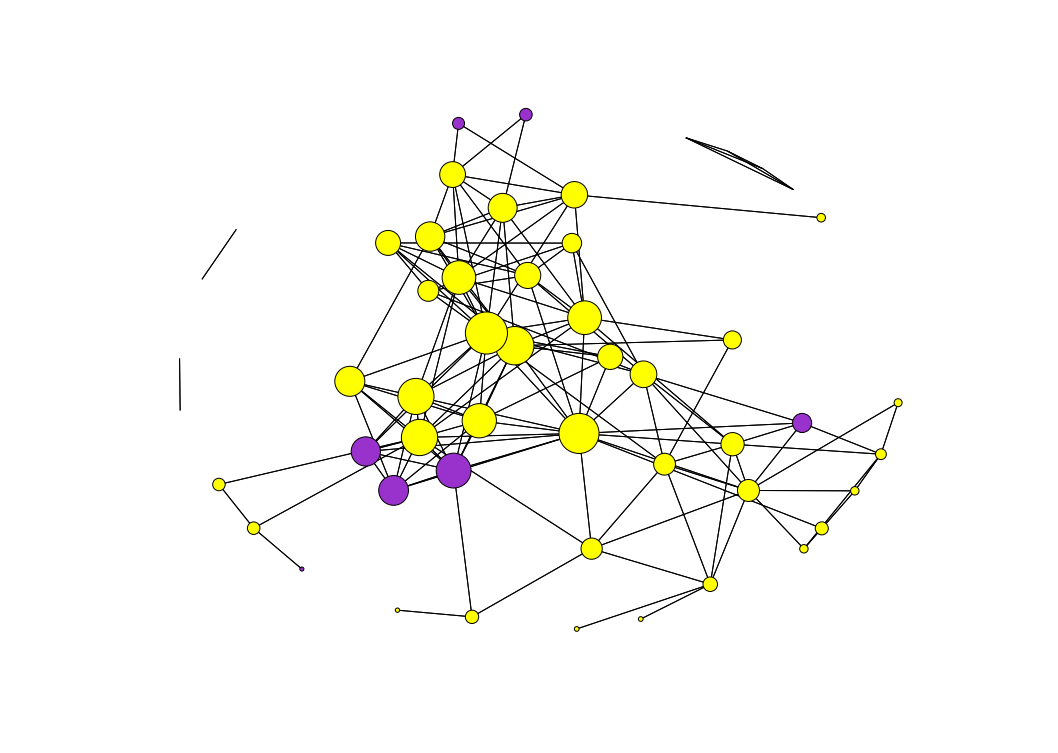

In [10]:

nx.draw(social_n3980,nodelist=n3980_prop[n3980_prop['Gender_1']==1]['node'].tolist(),
        node_size=list(compress(eigen_node_size,n3980_prop['Gender_1']==1)),
       node_color="darkorchid",pos=spring_pos)
nx.draw(social_n3980,nodelist=n3980_prop[n3980_prop['Gender_1']!=1]['node'].tolist(),
        node_size=list(compress(eigen_node_size,n3980_prop['Gender_1']!=1)),
        node_color="yellow",pos=spring_pos)

#### Boxplot to check the Centrality measures by gender
Let's draw boxplot to see how the centrality measures differ by gender

OrderedDict([(0, <matplotlib.axes._subplots.AxesSubplot at 0x7fe66427e590>),
             (1, <matplotlib.axes._subplots.AxesSubplot at 0x7fe663b2ee90>)])

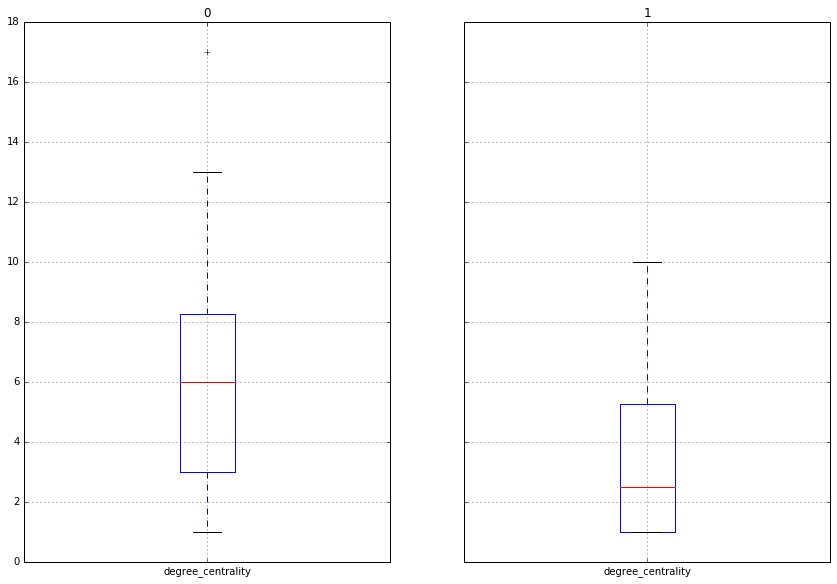

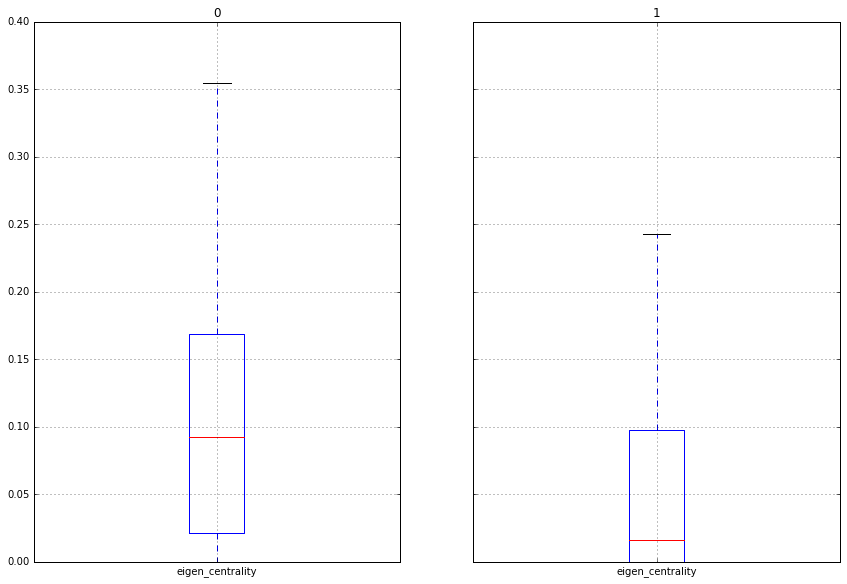

In [11]:
degree_centrality =[degrees[n] for n in n3980_prop['node']]
eigen_centrality = [eigen_degrees[n] for n in n3980_prop['node']]
n3980_prop['degree_centrality'] = degree_centrality
n3980_prop['eigen_centrality'] = eigen_centrality
n3980_prop[1:2]
by_gender_degree=n3980_prop[['degree_centrality','Gender_1']].groupby('Gender_1')
by_gender_degree.boxplot(return_type='axes',column='degree_centrality')
by_gender_eigen=n3980_prop[['eigen_centrality','Gender_1']].groupby('Gender_1')
by_gender_eigen.boxplot(return_type='axes',column='eigen_centrality')

### T-tests
#### T-test for Degree Centrality
Let's conduct a two sample t-test to check if the degree centality difference between gender groups is statistically significant or not. We shall use significance level of 0.05

In [12]:
from scipy import stats
stats.ttest_ind(n3980_prop[n3980_prop['Gender_1']==1]['degree_centrality'],
                n3980_prop[n3980_prop['Gender_1']!=1]['degree_centrality'])

Ttest_indResult(statistic=-2.0600069688507898, pvalue=0.044621767381978976)

**The p-value of the t-test is less than 0.05. So, the degree centrality do differ by gender**
### T-test for Eigenvector Centrality

Let's conduct a two sample t-test to check if the eigenvector centality difference between gender groups is statistically significant or not. We shall use significance level of 0.05

In [13]:

stats.ttest_ind(n3980_prop[n3980_prop['Gender_1']==1]['eigen_centrality'],
                n3980_prop[n3980_prop['Gender_1']!=1]['eigen_centrality'])

Ttest_indResult(statistic=-1.5354246938456482, pvalue=0.1309838334267302)

The p-value is 0.13 which is higher than the significance level 0.05. **So, there is not much difference in eigenvalue centrality by gender.**

### Conclusion
For the network analyzed the degree centrality measure differs significantly between two gender group. But, the difference in eigenvector centrality by gender is not statistically significant. Note: These results cannot be generalized as the sample maynot represent the population as the sample size is very small and given it is one network we can't say the the sample is random.
